In [1]:
import pandas as pd
import numpy as np
import utils
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose

In [40]:
import utils 
from utils import generate_submission_file, mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import pandas as pd 
import numpy as np 
import statsmodels.api as sm  # <--- Yay! API! 
%matplotlib inline 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16, 5)
from statsmodels.tsa.statespace.sarimax import SARIMAX

import itertools

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)   
warnings.filterwarnings("ignore") # specify to ignore warning messages

In [3]:
data = pd.read_csv('data/data.csv')

In [4]:
data['date'] = pd.to_datetime(data['date'])

In [5]:
data = data.set_index('date')
data = data.sort_index()

In [6]:
area_1_raw = data[data.variable == 'area_1'].drop('variable', axis = 1).sort_index()
area_2_raw = data[data.variable == 'area_2'].drop('variable', axis = 1).sort_index()
area_3_raw = data[data.variable == 'area_3'].drop('variable', axis = 1).sort_index()

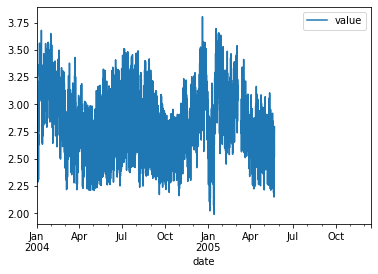

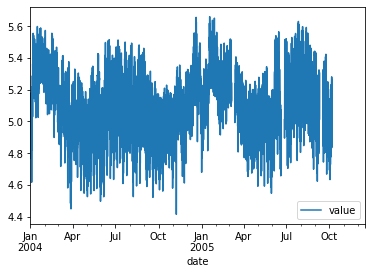

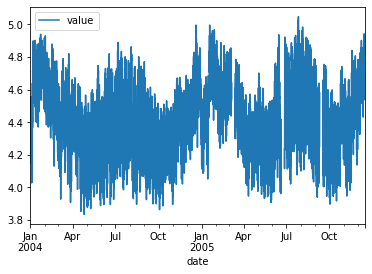

In [22]:
np.log(area_1_raw).plot()
np.log(area_2_raw).plot()
np.log(area_3_raw).plot()

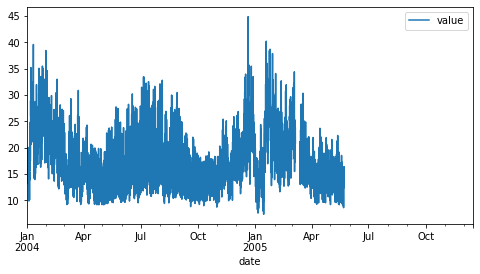

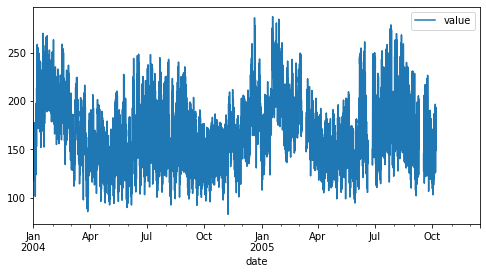

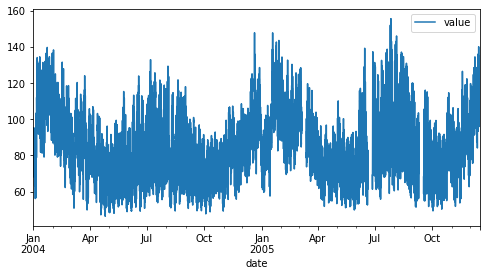

In [13]:
area_1_raw.plot()
area_2_raw.plot()
area_3_raw.plot()

plt.rcParams['figure.figsize'] = (6, 4)

In [14]:
area_1 = area_1_raw.dropna()
area_2 = area_2_raw.dropna()
area_3 = area_3_raw.dropna()

In [15]:
train_1 = area_1[:-168]
train_2 = area_2[:-168]
train_3 = area_3[:-168]

test_1 = area_1[-168:]
test_2 = area_2[-168:]
test_3 = area_3[-168:]

In [ ]:
decomposition = seasonal_decompose(plot_1, model='additive')
decomposition

In [23]:
#Area 1
mae_1 = sm.tsa.statespace.SARIMAX(train_1,
                                  order=(1, 1, 1),
                                  seasonal_order=(1, 1, 1, 12))

results_1 = mae_1.fit()
predictions_mae_model_1 = results_1.get_forecast(steps=168)
predicted_mean_1 = predictions_mae_model_1.predicted_mean

In [24]:
#Area 2
mae_1 = sm.tsa.statespace.SARIMAX(train_2,
                                  order=(1, 1, 1),
                                  seasonal_order=(1, 1, 1, 12))

results_2 = mae_1.fit()
predictions_mae_model_2 = results_2.get_forecast(steps=168)
predicted_mean_2 = predictions_mae_model_2.predicted_mean

In [25]:
#Area 3
mae_3 = sm.tsa.statespace.SARIMAX(train_3,
                                  order=(1, 1, 1),
                                  seasonal_order=(1, 1, 1, 12))

results_3 = mae_3.fit()
predictions_mae_model_3 = results_3.get_forecast(steps=168)
predicted_mean_3 = predictions_mae_model_3.predicted_mean

In [42]:
mape_1 = mean_absolute_percentage_error(test_1, predicted_mean_1)
mape_2 = mean_absolute_percentage_error(test_2, predicted_mean_2)
mape_3 = mean_absolute_percentage_error(test_3, predicted_mean_3)

In [43]:
print(mape_1)
print(mape_2)
print(mape_3)

23.82059520385277
29.880934672051556
14.320625559820893


In [44]:
generate_submission_file(predicted_mean_1.values, predicted_mean_2.values, predicted_mean_3.values)

,value
date,
2005-05-23 00:00:00,11.044758
2005-05-23 01:00:00,10.361698
2005-05-23 02:00:00,10.120966
2005-05-23 03:00:00,10.233119
2005-05-23 04:00:00,10.469820
2005-05-23 05:00:00,10.621947
2005-05-23 06:00:00,11.072998
2005-05-23 07:00:00,12.112873
2005-05-23 08:00:00,13.901284
